In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rgupta12/metro-interstate-traffic-volume")

100%|██████████| 1.12M/1.12M [00:00<00:00, 60.7MB/s]

Extracting files...


Dataset shape: (48204, 9)
  holiday    temp  ...            date_time  traffic_volume
0     NaN  288.28  ...  2012-10-02 09:00:00            5545
1     NaN  289.36  ...  2012-10-02 10:00:00            4516
2     NaN  289.58  ...  2012-10-02 11:00:00            4767
3     NaN  290.13  ...  2012-10-02 12:00:00            5026
4     NaN  291.14  ...  2012-10-02 13:00:00            4918

[5 rows x 9 columns]
Mean Squared Error: 3217364.20


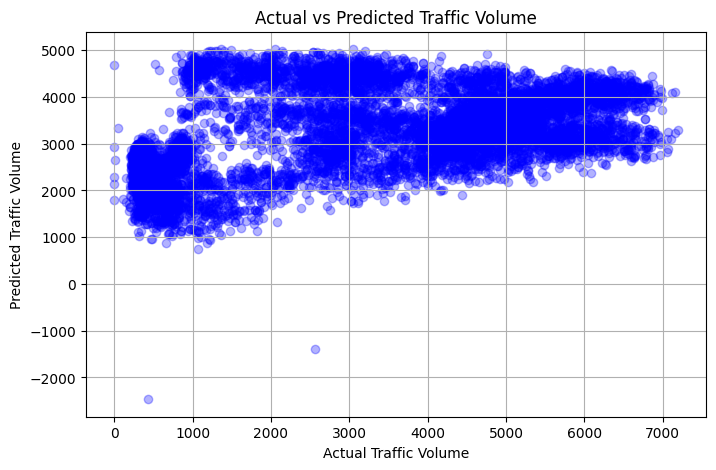

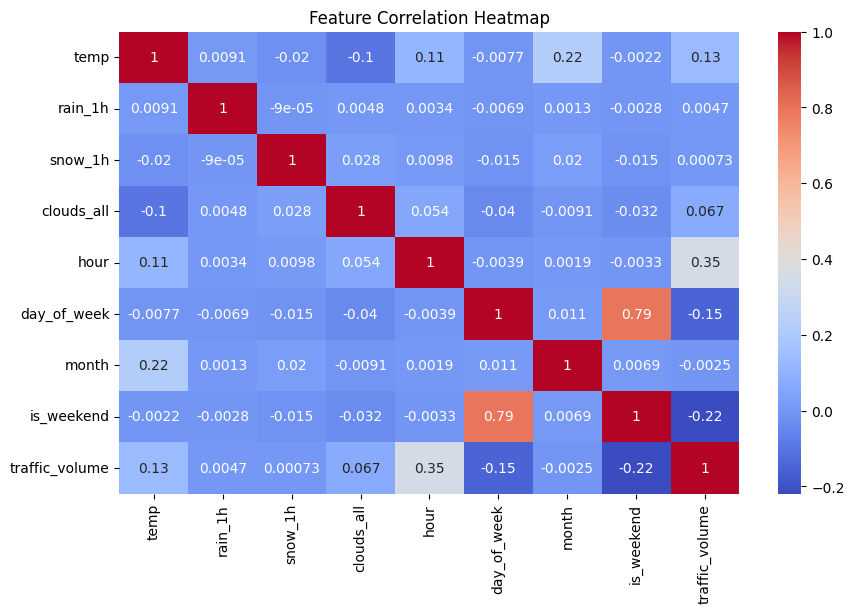

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

csv_path = f"{path}/Metro_Interstate_Traffic_Volume.csv"

# Step 2: Load Data
df = pd.read_csv(csv_path)
print("Dataset shape:", df.shape)
print(df.head())

# Step 3: Feature Engineering
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Step 4: Select Features
features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week', 'month', 'is_weekend']
X = df[features]
y = df['traffic_volume']

# Step 5: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 9: Visualize Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs Predicted Traffic Volume")
plt.grid(True)
plt.show()

# Step 10: Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[features + ['traffic_volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
